# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [159]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd

In [160]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [161]:
##### Visit the website

# Set url variable to the website url
url = 'https://static.bc-edx.com/data/web/mars_facts/temperature.html'

# Use the visit command to visit website
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [162]:
#### Create a Beautiful Soup Object

# Store the website html as a variable
html = browser.html

# Create the Beautiful Soup object
soup = BeautifulSoup(html, 'html.parser')

In [163]:
# Extract all rows of data using the soup object and the identifying class "data-row"
table_rows = soup.find_all('tr', class_="data-row")

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [164]:
# Create an empty list
row_list = []


# Loop through the scraped data to create a list of rows
for row in table_rows:

    # Store the whole row so each element can be referenced
    row_info = row.find_all("td")

    # Store each value in the table as a variable:
    id = row_info[0].text
    terrestrial_date = row_info[1].text
    sol = row_info[2].text
    ls = row_info[3].text
    month = row_info[4].text
    min_temp = row_info[5].text
    pressure = row_info[6].text

    # Store values in a dictionary
    row_dict = {
    "id":id,
    'terrestrial_date':terrestrial_date,
    'sol':sol,
    'ls':ls,
    'month':month,
    'min_temp':min_temp,
    'pressure':pressure
    }
    # Append the dictionary to the list
    row_list.append(row_dict)

# Print list to check for correctness
row_list

[{'id': '2',
  'terrestrial_date': '2012-08-16',
  'sol': '10',
  'ls': '155',
  'month': '6',
  'min_temp': '-75.0',
  'pressure': '739.0'},
 {'id': '13',
  'terrestrial_date': '2012-08-17',
  'sol': '11',
  'ls': '156',
  'month': '6',
  'min_temp': '-76.0',
  'pressure': '740.0'},
 {'id': '24',
  'terrestrial_date': '2012-08-18',
  'sol': '12',
  'ls': '156',
  'month': '6',
  'min_temp': '-76.0',
  'pressure': '741.0'},
 {'id': '35',
  'terrestrial_date': '2012-08-19',
  'sol': '13',
  'ls': '157',
  'month': '6',
  'min_temp': '-74.0',
  'pressure': '732.0'},
 {'id': '46',
  'terrestrial_date': '2012-08-20',
  'sol': '14',
  'ls': '157',
  'month': '6',
  'min_temp': '-74.0',
  'pressure': '740.0'},
 {'id': '57',
  'terrestrial_date': '2012-08-21',
  'sol': '15',
  'ls': '158',
  'month': '6',
  'min_temp': '-78.0',
  'pressure': '740.0'},
 {'id': '68',
  'terrestrial_date': '2012-08-22',
  'sol': '16',
  'ls': '158',
  'month': '6',
  'min_temp': '-77.0',
  'pressure': '740.0'},


In [165]:
# Create a Pandas DataFrame by using the list of rows
mars_df = pd.DataFrame(row_list).set_index("id")

In [166]:
# Confirm DataFrame was created successfully
mars_df

,terrestrial_date,sol,ls,month,min_temp,pressure
id,,,,,,
2,2012-08-16,10,155,6,-75.0,739.0
13,2012-08-17,11,156,6,-76.0,740.0
24,2012-08-18,12,156,6,-76.0,741.0
35,2012-08-19,13,157,6,-74.0,732.0
46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...
1889,2018-02-23,1973,133,5,-78.0,730.0
1892,2018-02-24,1974,134,5,-77.0,729.0
1894,2018-02-25,1975,134,5,-76.0,729.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [167]:
# Examine data type of each column
mars_df.dtypes

terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [168]:
# Change data types for data analysis
mars_df = mars_df.astype({"min_temp":float})
mars_df = mars_df.astype({"pressure":float})
mars_df = mars_df.astype({"sol":int})
mars_df = mars_df.astype({"ls":int})
mars_df = mars_df.astype({"month":int})
mars_df["terrestrial_date"] = pd.to_datetime(mars_df["terrestrial_date"])

In [169]:
# Confirm type changes were successful by examining data types again
mars_df.dtypes

terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [170]:
# 1. How many months are there on Mars?

# Store the value of the highest month into a variable. The maximum number should represent the total number of months
mon_num = mars_df["month"].max()
# Print the answer
print(f"There are {mon_num} months on mars.")

There are 12 months on mars.


In [171]:
# 2. How many Martian days' worth of data are there?

# Count the number of distinct values for the column "sol"
sols = mars_df["sol"].unique()
sol_num = len(sols)
# Print the answer
print(f"There are {sol_num} sols worth of data.")


There are 1867 sols worth of data.


In [172]:
# 3. What is the average low temperature by month?

# Group by month and then find the average of the column "min_temp"
mars_df_sorted = mars_df.sort_values("month")
avg_month = mars_df_sorted.groupby(["month"]).mean()
temp_min = avg_month["min_temp"]
print(temp_min)


month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64


<BarContainer object of 12 artists>

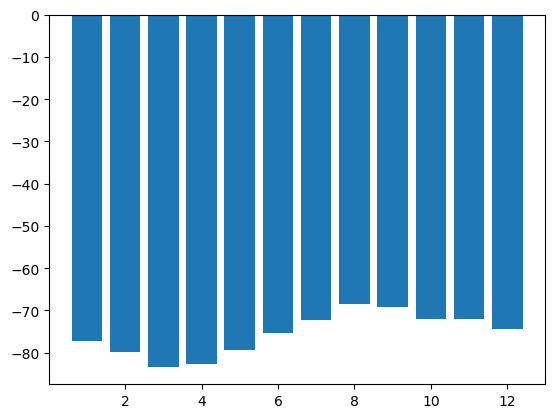

In [173]:
# Plot the average temperature by month
plt.bar(temp_min.index, temp_min)

In [174]:
# Identify the coldest and hottest months in Curiosity's location

# Save the hottest month as the max from the above series and the coldest as the min from above series
hottest = temp_min.max()
coldest = temp_min.min()

# Loop through the temp_min series and search for the month number of the hottest and coldest values
for i, temp in enumerate(temp_min):
    if temp==hottest:
        hottest_month = i
    if temp==coldest:
        coldest_month = i

# Print the answer
print(f"The hottest month is month {hottest_month}, and the average temperature is {hottest}.")
print(f"The coldest month is month {coldest_month}, and the average temperature is {coldest}.")

The hottest month is month 7, and the average temperature is -68.38297872340425.
The coldest month is month 2, and the average temperature is -83.30729166666667.


In [175]:
# 4. Average pressure by Martian month

# Select the pressure column from the grouped by month series
pressure_avgs = avg_month["pressure"]

<BarContainer object of 12 artists>

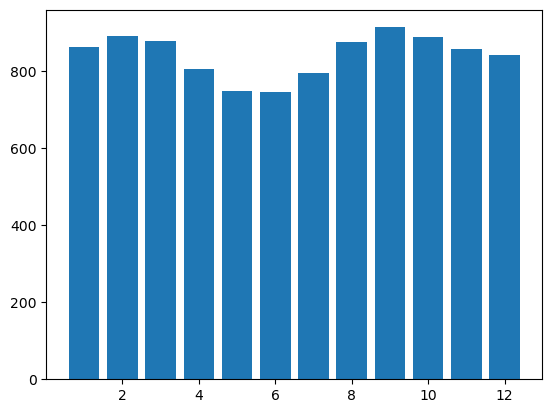

In [176]:
# Plot the average pressure by month
plt.bar(pressure_avgs.index, pressure_avgs)

In [177]:
# Identify the lowest and highest pressure months in Curiosity's location

# Save the highest month as the max from the above series and the coldest as the min from above series
highest = pressure_avgs.max()
lowest = pressure_avgs.min()

# Loop through the temp_min series and search for the month number of the highest and coldest values
for i, pres in enumerate(pressure_avgs):
    if pres==highest:
        highest_month = i
    if pres==lowest:
        lowest_month = i

# Print the answer
print(f"The highest pressure month is month {highest_month}, and the average pressure is {highest}.")
print(f"The lowest pressure month is month {lowest_month}, and the average pressure is {lowest}.")

The highest pressure month is month 8, and the average pressure is 913.3059701492538.
The lowest pressure month is month 5, and the average pressure is 745.0544217687075.


In [178]:
# 5. How many terrestrial (earth) days are there in a Martian year?

# Count number of days on earth that pass in the cycle of solar longitude
# Store the terrestrial date when ls is 0
dates_year = mars_df.loc[mars_df["ls"]==0,["terrestrial_date"]]

# Store the dates between one cycle of solar longitude
date_1 = dates_year["terrestrial_date"][1]
date_2 = dates_year["terrestrial_date"][2]

# Calculate the change between these dates
change = date_2 - date_1

# Print the change
print(f"There are approximately {change.days} Earth days in a Martian year.")

There are approximately 686 Earth days in a Martian year.


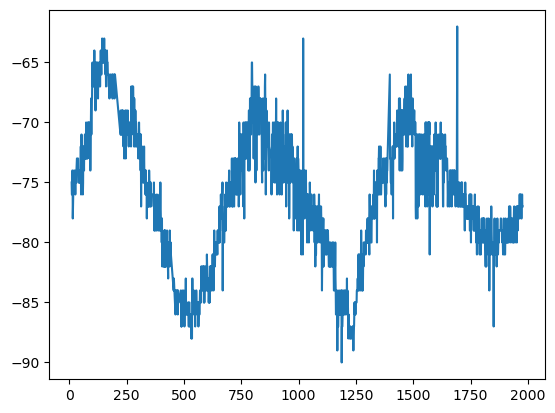

In [187]:
# Plot the daily minimum temperature to visualize the year in terms of changing temps

# Store the x and y axes as the number of sols and the minimum temperatres
days = mars_df["sol"]
temp = mars_df["min_temp"]

# Plot these axes
plt.plot(days, temp)

On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [180]:
# Write the data to a CSV
mars_df.to_csv("mars_weather.csv", index_label="id")

In [181]:
browser.quit()